#Loading Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset loading
    
  



In [112]:
dataset=pd.read_csv('/content/drive/MyDrive/Dataset.csv')

In [113]:
dataset.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [114]:
dataset.index

RangeIndex(start=0, stop=14057, step=1)

# Data preprocessing
     1.data cleaning
     2.data transformation
     3.data clustering

Data cleaning

In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057 entries, 0 to 14056
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         14057 non-null  int64  
 1   Restaurant Name       14057 non-null  object 
 2   Country Code          14057 non-null  int64  
 3   City                  14057 non-null  object 
 4   Address               14057 non-null  object 
 5   Locality              14057 non-null  object 
 6   Locality Verbose      14057 non-null  object 
 7   Longitude             14057 non-null  float64
 8   Latitude              14057 non-null  float64
 9   Cuisines              14048 non-null  object 
 10  Average Cost for two  14057 non-null  int64  
 11  Currency              14057 non-null  object 
 12  Has Table booking     14057 non-null  object 
 13  Has Online delivery   14057 non-null  object 
 14  Is delivering now     14057 non-null  object 
 15  Switch to order men

In [116]:
dataset.shape,dataset.size

((14057, 21), 295197)

In [117]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [119]:
mean=dataset.mean
mean()

Restaurant ID           9.093404e+06
Country Code            1.279903e+01
Longitude               6.699996e+01
Latitude                2.624872e+01
Average Cost for two    9.935137e+02
Price range             1.728249e+00
Aggregate rating        2.539233e+00
Votes                   1.310712e+02
dtype: float64

# Training & Testing

In [121]:
train=pd.read_csv('/content/drive/MyDrive/Dataset.csv')
test=pd.read_csv('/content/drive/MyDrive/Dataset.csv')
train.head(),test.head()


(   Restaurant ID         Restaurant Name  Country Code              City  \
 0        6317637        Le Petit Souffle           162       Makati City   
 1        6304287        Izakaya Kikufuji           162       Makati City   
 2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
 3        6318506                    Ooma           162  Mandaluyong City   
 4        6314302             Sambo Kojin           162  Mandaluyong City   
 
                                              Address  \
 0  Third Floor, Century City Mall, Kalayaan Avenu...   
 1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
 2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
 3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
 4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   
 
                                      Locality  \
 0   Century City Mall, Poblacion, Makati City   
 1  Little Tokyo, Legaspi Village, Makati City   
 2  Edsa Shangri-La, Ortigas, Mandaluyong 

In [120]:
train.isnull().sum()
print("Train Shape:",train.shape)
test.isnull().sum()
print("Test Shape:",test.shape)

Train Shape: (14057, 21)
Test Shape: (14057, 21)


In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057 entries, 0 to 14056
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         14057 non-null  int64  
 1   Restaurant Name       14057 non-null  object 
 2   Country Code          14057 non-null  int64  
 3   City                  14057 non-null  object 
 4   Address               14057 non-null  object 
 5   Locality              14057 non-null  object 
 6   Locality Verbose      14057 non-null  object 
 7   Longitude             14057 non-null  float64
 8   Latitude              14057 non-null  float64
 9   Cuisines              14048 non-null  object 
 10  Average Cost for two  14057 non-null  int64  
 11  Currency              14057 non-null  object 
 12  Has Table booking     14057 non-null  object 
 13  Has Online delivery   14057 non-null  object 
 14  Is delivering now     14057 non-null  object 
 15  Switch to order men

In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057 entries, 0 to 14056
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         14057 non-null  int64  
 1   Restaurant Name       14057 non-null  object 
 2   Country Code          14057 non-null  int64  
 3   City                  14057 non-null  object 
 4   Address               14057 non-null  object 
 5   Locality              14057 non-null  object 
 6   Locality Verbose      14057 non-null  object 
 7   Longitude             14057 non-null  float64
 8   Latitude              14057 non-null  float64
 9   Cuisines              14048 non-null  object 
 10  Average Cost for two  14057 non-null  int64  
 11  Currency              14057 non-null  object 
 12  Has Table booking     14057 non-null  object 
 13  Has Online delivery   14057 non-null  object 
 14  Is delivering now     14057 non-null  object 
 15  Switch to order men

In [124]:
dataset.set_axis(['Restaurent Id','Restaurent Name','Country Code','City','Address','Locality','Locality verb','Longitude','Latitude','Cuisines','Average cost','Currency','Reservation','Online delivery','Service available','Items menu','Price','Aggregate rating','color','Text','Feedbacks'],inplace=True,axis='columns')


In [125]:
dataset.head()

,Restaurent Id,Restaurent Name,Country Code,City,Address,Locality,Locality verb,Longitude,Latitude,Cuisines,...,Currency,Reservation,Online delivery,Service available,Items menu,Price,Aggregate rating,color,Text,Feedbacks
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# EDA-Analysis- Restaurent Recomendations
  performing the reccomendations based on the restaurent name , Location, Address etc..,

Here we are analysing and performing the restaurnt recommendations

[]

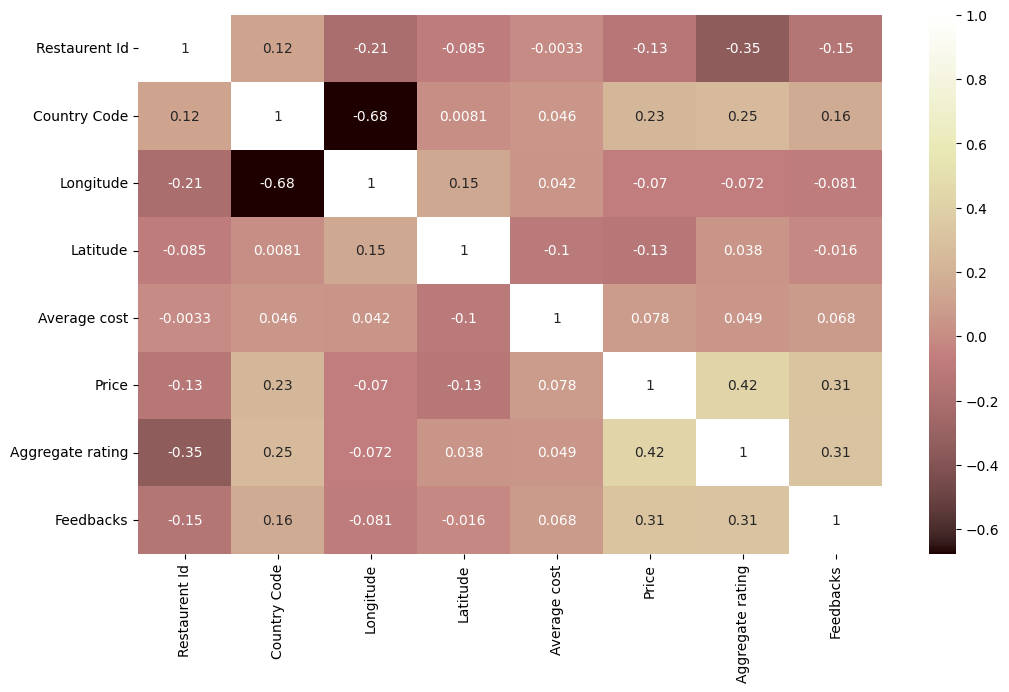

In [126]:
plt.figure(figsize=(12,7))
sns.heatmap(dataset.corr(),annot=True,cmap='pink')
plt.plot()

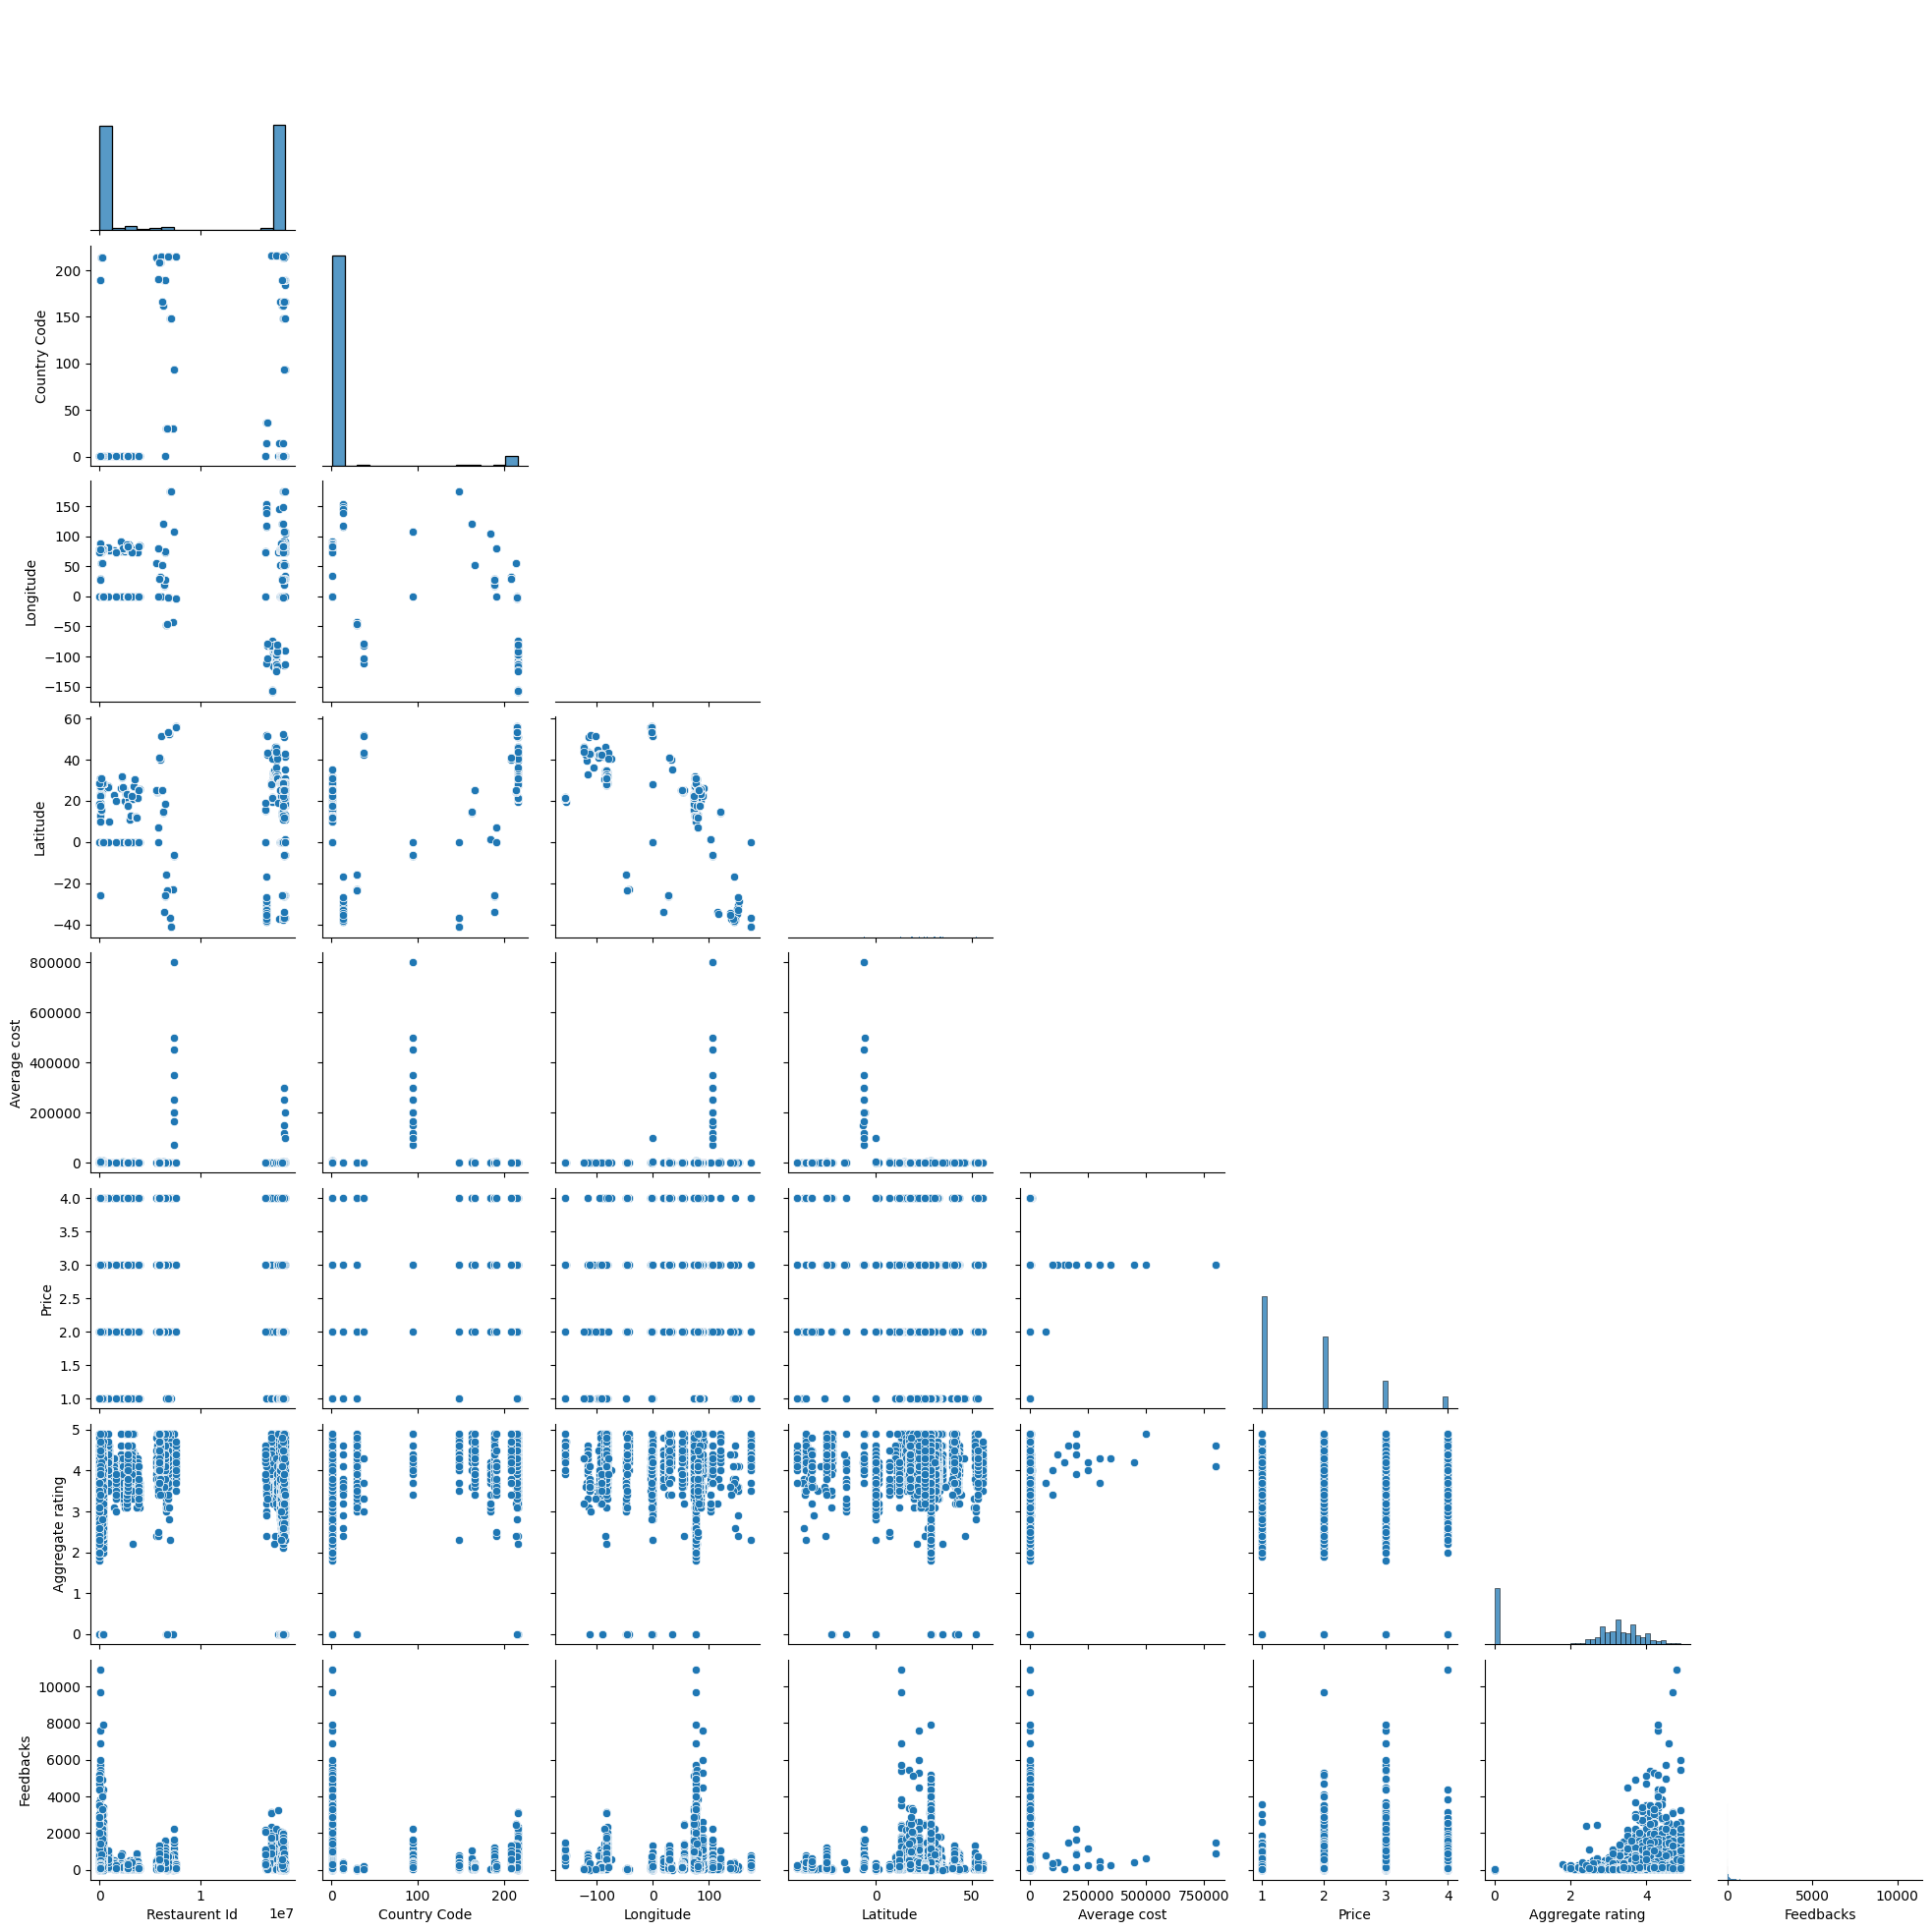

In [127]:
sns.pairplot(dataset,corner=True)
plt.show()

In [128]:
fig=px.bar(dataset.head(),x='Restaurent Name',y='Address',template='ggplot2')
fig.show()

In [129]:
fig = px.line(dataset, x="Country Code", y="City", color='Restaurent Name',markers=True,color_discrete_sequence=['White','orange'],template='plotly_dark')
fig.show()

# Label Encoding

In [130]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['City']=le.fit_transform(dataset['City'])
dataset['Restaurent Name']=le.fit_transform(dataset['Restaurent Name'])
dataset

,Restaurent Id,Restaurent Name,Country Code,City,Address,Locality,Locality verb,Longitude,Latitude,Cuisines,...,Currency,Reservation,Online delivery,Service available,Items menu,Price,Aggregate rating,color,Text,Feedbacks
0,6317637,3748,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,3172,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,2896,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,4707,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,5523,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14052,5915730,4443,208,140,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
14053,5908749,1310,208,140,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
14054,5915807,3068,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
14055,5916112,512,208,140,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [131]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        dataset[i]=l.fit_transform(dataset[i])

In [132]:
X = dataset.drop('Restaurent Name',axis=1)
y = dataset['City']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [133]:
mean=dataset.mean
mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of        Restaurent Id  Restaurent Name  Country Code  City  Address  Locality  \
0            6317637             3748           162    73     8685       171   
1            6304287             3172           162    73     6055       593   
2            6300002             2896           162    75     4684       308   
3            6318506             4707           162    75     8690       862   
4            6314302             5523           162    75     8689       862   
...              ...              ...           ...   ...      ...       ...   
14052        5915730             4443           208   140     5926       517   
14053        5908749             1310           208   140     5962       552   
14054        5915807             3068           208   140     5966       554   
14055        5916112              512           208   140     5967       554   
14056        5927402             7240           208   140

# Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

Evaluating the Training prediction

In [135]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

ytrain_pred = lr.predict(xtrain)

# evaluating the testing data

mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mse))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

#model training using regr

The model performance for training set
--------------------------------------
MSE is 1.4790811649089054e-24
RMSE is 1.2161748085324353e-12
R2 score is 1.0




Evaluating the Testing prediction

In [136]:
ytest_pred = lr.predict(xtest)

mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("the model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

the model performance for training set
--------------------------------------
MSE is 2.99643245545558e-24
RMSE is 1.7310206398121253e-12
R2 score is 1.0




In [137]:
mean=dataset.mean
mean()

Restaurent Id        9.093404e+06
Restaurent Name      3.653448e+03
Country Code         1.279903e+01
City                 8.147322e+01
Address              4.598322e+03
Locality             7.054204e+02
Locality verb        7.258140e+02
Longitude            6.699996e+01
Latitude             2.624872e+01
Cuisines             1.000164e+03
Average cost         9.935137e+02
Currency             3.984847e+00
Reservation          1.168101e-01
Online delivery      2.618624e-01
Service available    3.556947e-03
Items menu           0.000000e+00
Price                1.728249e+00
Aggregate rating     2.539233e+00
color                3.002490e+00
Text                 1.715515e+00
Feedbacks            1.310712e+02
dtype: float64

In [139]:
mean=dataset["Service available"].mean
mean()

0.0035569467169381803